### Python 株価を予想する。時系列予測ライブラリ「Prophet」
@see https://hk29.hatenablog.jp/entry/2020/12/06/230617

In [1]:
# csvファイルを読み込む
import pandas as pd
from prophet import Prophet
df = pd.read_csv('N225.csv')
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2018-01-04,23506.330078,23065.199219,23073.730469,23506.330078,102200000.0,23506.330078
1,2018-01-05,23730.470703,23520.519531,23643.000000,23714.529297,101900000.0,23714.529297
2,2018-01-09,23952.609375,23789.029297,23948.970703,23849.990234,94100000.0,23849.990234
3,2018-01-10,23864.759766,23755.449219,23832.810547,23788.199219,88800000.0,23788.199219
4,2018-01-11,23734.970703,23601.839844,23656.390625,23710.429688,83700000.0,23710.429688
...,...,...,...,...,...,...,...
724,2020-12-24,26764.529297,26605.259766,26635.109375,26668.349609,47900000.0,26668.349609
725,2020-12-25,26716.609375,26638.279297,26708.099609,26656.609375,33400000.0,26656.609375
726,2020-12-28,26854.029297,26664.599609,26691.289062,26854.029297,50700000.0,26854.029297
727,2020-12-29,27602.519531,26921.140625,26936.380859,27568.150391,59400000.0,27568.150391


In [2]:
# 列名を日時はds、目的変数をyに変更する。Prophetの仕様のため。
new_df = df.rename(columns={'Date': 'ds', 'Adj Close': 'y'})
new_df

,ds,High,Low,Open,Close,Volume,y
0,2018-01-04,23506.330078,23065.199219,23073.730469,23506.330078,102200000.0,23506.330078
1,2018-01-05,23730.470703,23520.519531,23643.000000,23714.529297,101900000.0,23714.529297
2,2018-01-09,23952.609375,23789.029297,23948.970703,23849.990234,94100000.0,23849.990234
3,2018-01-10,23864.759766,23755.449219,23832.810547,23788.199219,88800000.0,23788.199219
4,2018-01-11,23734.970703,23601.839844,23656.390625,23710.429688,83700000.0,23710.429688
...,...,...,...,...,...,...,...
724,2020-12-24,26764.529297,26605.259766,26635.109375,26668.349609,47900000.0,26668.349609
725,2020-12-25,26716.609375,26638.279297,26708.099609,26656.609375,33400000.0,26656.609375
726,2020-12-28,26854.029297,26664.599609,26691.289062,26854.029297,50700000.0,26854.029297
727,2020-12-29,27602.519531,26921.140625,26936.380859,27568.150391,59400000.0,27568.150391


In [3]:
# 予測したい数
predict_num = 15
# 訓練データの作成する。全データから予測したい数を引いた数
cnt = len(new_df) - predict_num
train_df = new_df[:cnt]
train_df

,ds,High,Low,Open,Close,Volume,y
0,2018-01-04,23506.330078,23065.199219,23073.730469,23506.330078,102200000.0,23506.330078
1,2018-01-05,23730.470703,23520.519531,23643.000000,23714.529297,101900000.0,23714.529297
2,2018-01-09,23952.609375,23789.029297,23948.970703,23849.990234,94100000.0,23849.990234
3,2018-01-10,23864.759766,23755.449219,23832.810547,23788.199219,88800000.0,23788.199219
4,2018-01-11,23734.970703,23601.839844,23656.390625,23710.429688,83700000.0,23710.429688
...,...,...,...,...,...,...,...
709,2020-12-03,26868.089844,26719.230469,26740.300781,26809.369141,69500000.0,26809.369141
710,2020-12-04,26799.830078,26646.080078,26697.259766,26751.240234,61600000.0,26751.240234
711,2020-12-07,26894.250000,26500.320312,26894.250000,26547.439453,61600000.0,26547.439453
712,2020-12-08,26523.300781,26327.080078,26380.320312,26467.080078,55100000.0,26467.080078


In [4]:
# モデルの作成
model = Prophet(
    growth='linear', # 傾向変動の関数．非線形は'logistic'
    yearly_seasonality = True, # 年次の季節変動を考慮有無
    weekly_seasonality = False, # 週次の季節変動を考慮有無
    daily_seasonality = False, # 日次の季節変動を考慮有無
    changepoints = None, #  傾向変化点のリスト
    changepoint_range = 0.85, # 傾向変化点の候補の幅で先頭からの割合。
    changepoint_prior_scale = 0.5, # 傾向変化点の事前分布のスケール値。パラメータの柔軟性
    n_changepoints = 5, # 傾向変化点の数
) 
model.fit(train_df)

/opt/conda/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [5]:
# 学習データに予測したい期間を追加する
future = model.make_future_dataframe(periods = predict_num) #,freq='M')
future

,ds
0,2018-01-04
1,2018-01-05
2,2018-01-09
3,2018-01-10
4,2018-01-11
...,...
724,2020-12-20
725,2020-12-21
726,2020-12-22
727,2020-12-23


In [6]:
# 予測する
forecast = model.predict(future)
forecast

/opt/conda/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-04,22498.653462,21680.968305,24028.445359,22498.653462,22498.653462,361.175083,361.175083,361.175083,361.175083,361.175083,361.175083,0.0,0.0,0.0,22859.828545
1,2018-01-05,22501.233602,21854.263366,24058.965049,22501.233602,22501.233602,406.353512,406.353512,406.353512,406.353512,406.353512,406.353512,0.0,0.0,0.0,22907.587114
2,2018-01-09,22511.554160,21907.350163,24280.718533,22511.554160,22511.554160,614.932989,614.932989,614.932989,614.932989,614.932989,614.932989,0.0,0.0,0.0,23126.487149
3,2018-01-10,22514.134299,22076.602026,24310.508961,22514.134299,22514.134299,667.776158,667.776158,667.776158,667.776158,667.776158,667.776158,0.0,0.0,0.0,23181.910457
4,2018-01-11,22516.714439,22074.982414,24460.665134,22516.714439,22516.714439,718.360816,718.360816,718.360816,718.360816,718.360816,718.360816,0.0,0.0,0.0,23235.075254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,2020-12-20,25152.680002,24637.460473,26781.856717,25152.680002,25152.680002,536.990221,536.990221,536.990221,536.990221,536.990221,536.990221,0.0,0.0,0.0,25689.670222
725,2020-12-21,25173.702022,24471.472462,26777.211571,25173.702022,25173.702022,477.502123,477.502123,477.502123,477.502123,477.502123,477.502123,0.0,0.0,0.0,25651.204145
726,2020-12-22,25194.724042,24430.036926,26746.824392,25194.724042,25194.724042,422.340262,422.340262,422.340262,422.340262,422.340262,422.340262,0.0,0.0,0.0,25617.064304
727,2020-12-23,25215.746062,24462.959629,26713.352438,25215.746062,25215.746062,372.492100,372.492100,372.492100,372.492100,372.492100,372.492100,0.0,0.0,0.0,25588.238162


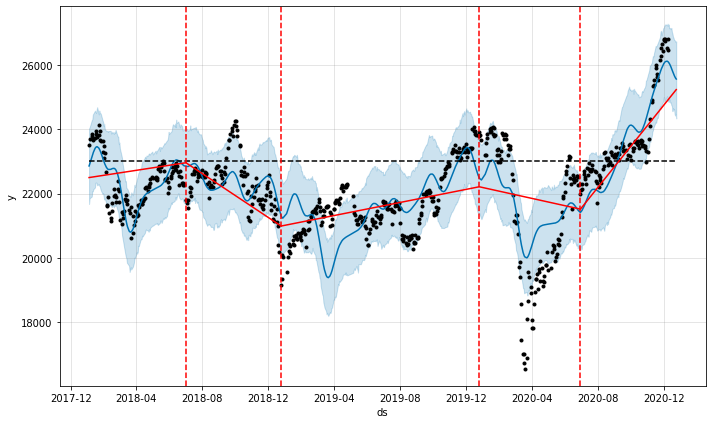

In [7]:
# 可視化する
import matplotlib.pyplot as plt
from prophet.plot import add_changepoints_to_plot
forecast['cap'] = 23000
#forecast['floor'] = 21000
fig1 = model.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), model, forecast)
plt.show()

/opt/conda/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


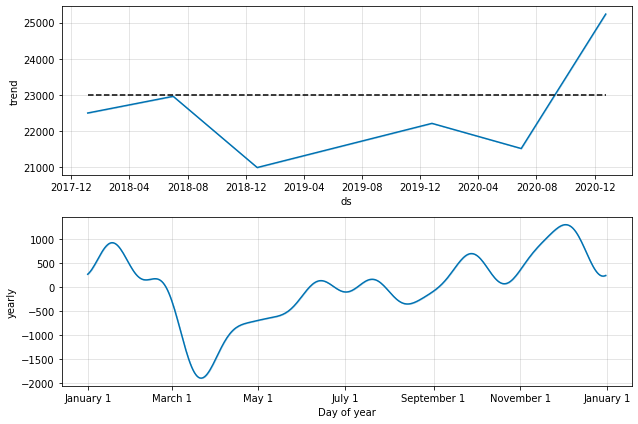

In [8]:
# 規則性を可視化
fig2 = model.plot_components(forecast)
plt.show()

In [9]:
import seaborn as sns

# 変化率を追記
df3 = train_df.loc[model.changepoints.index]
df3['delta'] = model.params['delta'].ravel()

# 変化点を取得
df3['ds'] = df3['ds'].astype(str)
df3['delta'] = df3['delta'].round(3)
df4 = df3[df3['delta'] != 0]
df4

,ds,High,Low,Open,Close,Volume,y,delta
121,2018-07-02,22312.250000,21784.480469,22233.800781,21811.929688,67100000.0,21811.929688,-0.550
242,2018-12-25,19785.429688,19117.960938,19785.429688,19155.740234,0.0,19155.740234,0.580
484,2019-12-26,23931.509766,23775.400391,23787.699219,23924.919922,40300000.0,23924.919922,-0.282
605,2020-06-30,22448.300781,22273.380859,22335.099609,22288.140625,74200000.0,22288.140625,0.987


/opt/conda/lib/python3.8/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


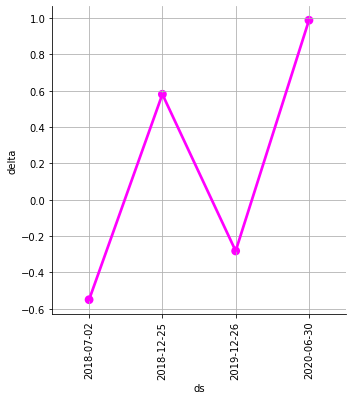

['2018-07-02', '2018-12-25', '2019-12-26', '2020-06-30']

In [10]:
# 変化点をグラフ化
import matplotlib.pyplot as plt
ax = sns.factorplot(x = 'ds', y = 'delta', data = df4, color='magenta')
ax.set_xticklabels(rotation=90)
plt.grid()
plt.show()
# 変化点をリストで抽出
ds_list = df4['ds'].tolist()
ds_list

In [11]:
# 変化点を指定してモデルの作成
model2 = Prophet(
    growth='linear', # 傾向変動の関数．非線形は'logistic'
    yearly_seasonality = True, # 年次の季節変動を考慮有無
    weekly_seasonality = False, # 週次の季節変動を考慮有無
    daily_seasonality = False, # 日次の季節変動を考慮有無
    changepoints = ds_list, #  傾向変化点のリスト
    #changepoint_range = 0.85, # 傾向変化点の候補の幅で先頭からの割合。
    #changepoint_prior_scale = 0.5, # 傾向変化点の事前分布のスケール値。パラメータの柔軟性
    #n_changepoints = 5, # 傾向変化点の数
) 
model2.fit(train_df)

/opt/conda/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [12]:
# 学習データに予測したい期間を追加する
future2 = model2.make_future_dataframe(periods = predict_num) #,freq='M')
future2

,ds
0,2018-01-04
1,2018-01-05
2,2018-01-09
3,2018-01-10
4,2018-01-11
...,...
724,2020-12-20
725,2020-12-21
726,2020-12-22
727,2020-12-23


In [13]:
# 予測2
forecast2 = model2.predict(future2)
forecast2

/opt/conda/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-04,22821.428985,21896.271751,24232.773630,22821.428985,22821.428985,279.634233,279.634233,279.634233,279.634233,279.634233,279.634233,0.0,0.0,0.0,23101.063217
1,2018-01-05,22820.752362,22057.648045,24238.388472,22820.752362,22820.752362,320.417377,320.417377,320.417377,320.417377,320.417377,320.417377,0.0,0.0,0.0,23141.169739
2,2018-01-09,22818.045871,22172.095370,24502.993998,22818.045871,22818.045871,514.933310,514.933310,514.933310,514.933310,514.933310,514.933310,0.0,0.0,0.0,23332.979181
3,2018-01-10,22817.369248,22219.081637,24606.414824,22817.369248,22817.369248,565.174086,565.174086,565.174086,565.174086,565.174086,565.174086,0.0,0.0,0.0,23382.543334
4,2018-01-11,22816.692626,22257.955223,24562.727430,22816.692626,22816.692626,613.524831,613.524831,613.524831,613.524831,613.524831,613.524831,0.0,0.0,0.0,23430.217456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,2020-12-20,24774.775511,24171.882591,26473.750510,24774.775511,24774.775511,546.880606,546.880606,546.880606,546.880606,546.880606,546.880606,0.0,0.0,0.0,25321.656117
725,2020-12-21,24792.154146,24082.423544,26478.814232,24792.154146,24792.154146,480.477257,480.477257,480.477257,480.477257,480.477257,480.477257,0.0,0.0,0.0,25272.631403
726,2020-12-22,24809.532781,24002.846809,26398.663766,24809.532781,24809.532781,418.386764,418.386764,418.386764,418.386764,418.386764,418.386764,0.0,0.0,0.0,25227.919546
727,2020-12-23,24826.911416,24041.738163,26320.737997,24826.911416,24826.911416,361.624741,361.624741,361.624741,361.624741,361.624741,361.624741,0.0,0.0,0.0,25188.536157


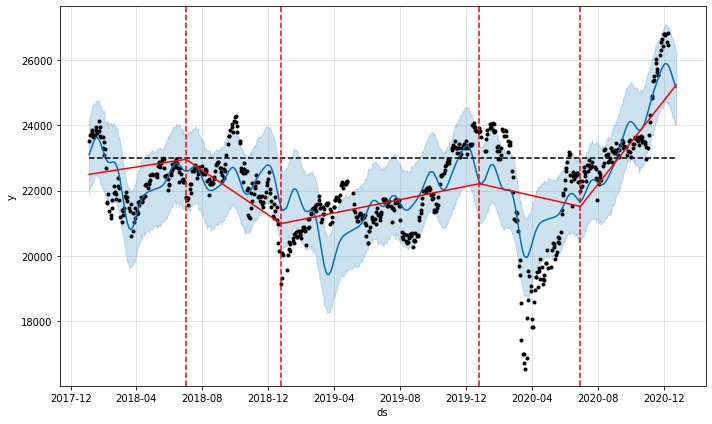

In [14]:
# 可視化
forecast2['cap'] = 23000
#forecast['floor'] = 21000
fig2_1 = model2.plot(forecast2)
b = add_changepoints_to_plot(fig2_1.gca(), model2, forecast)
plt.show()

/opt/conda/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


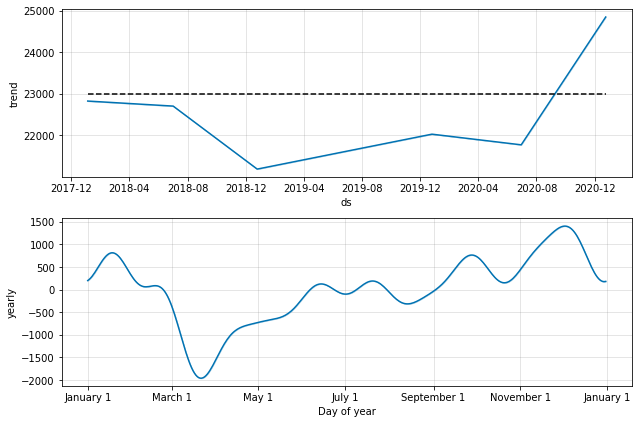

In [15]:
# 規則性を可視化
fig2_2 = model2.plot_components(forecast2)
plt.show()

In [16]:
# モデルを保存する
import json
from prophet.serialize import model_to_json, model_from_json
with open('test_prophet4_serialized_model.json', 'w') as fout:
    json.dump(model_to_json(model2), fout)

In [17]:
# モデルをロードする
import json
from prophet.serialize import model_to_json, model_from_json
with open('test_prophet4_serialized_model.json', 'r') as fin:
    model3 = model_from_json(json.load(fin))

/opt/conda/lib/python3.8/site-packages/prophet/serialize.py:136: FutureWarning: The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')
  setattr(model, attribute, pd.Timestamp.utcfromtimestamp(attr_dict[attribute]))


/opt/conda/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


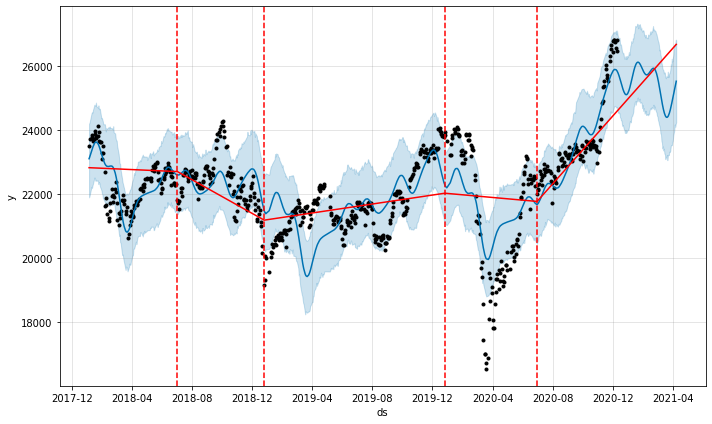

In [18]:
# (更に先の2021年3月頃の)未来を予測する
import prophet.plot as fp
future3 = model3.make_future_dataframe(periods=120)
forecast3 = model3.predict(future3)
fig3 = model3.plot(forecast3)
fp.add_changepoints_to_plot(fig3.gca(), model3, forecast3);
plt.show()